In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
from sklearn import metrics
from matplotlib.ticker import PercentFormatter

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data['dj_smooth'] = data.dj_return.rolling(4).mean()
data['dj_average'] = data.dj_return.mean()
data['year_type'] = ['favourable' if x > data.dj_return.mean() else 'unfavourable' for x in data.dj_return]
data['year_type_zero'] = ['favourable' if x > 0 else 'unfavourable' for x in data.dj_return]
data['benner_classification'] = data.minor_time == data.year_type

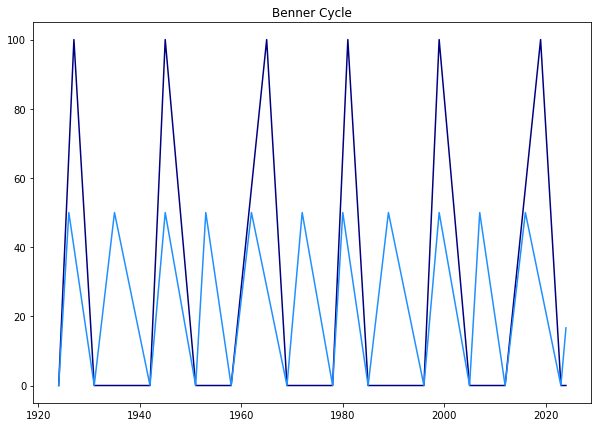

In [4]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax1.plot(data.year, data.major_value, color='navy')
ax1.plot(data.year, data.minor_value, color='dodgerblue')

plt.title('Benner Cycle')
plt.show()

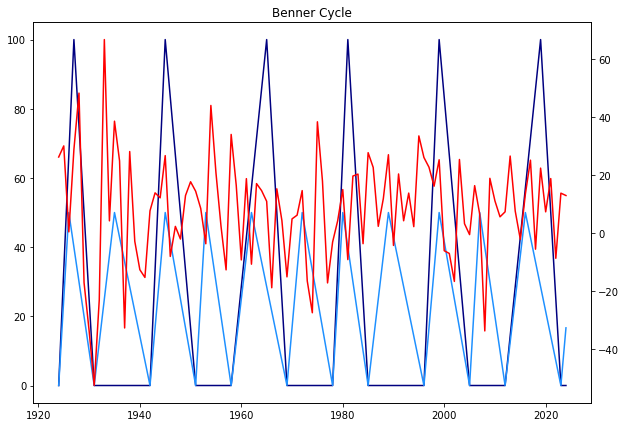

In [5]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax1.plot(data.year, data.major_value, color='navy')
ax1.plot(data.year, data.minor_value, color='dodgerblue')

ax2 = ax1.twinx()

ax2.plot(data.year, data.dj_return, color='red')

plt.title('Benner Cycle')
plt.show()

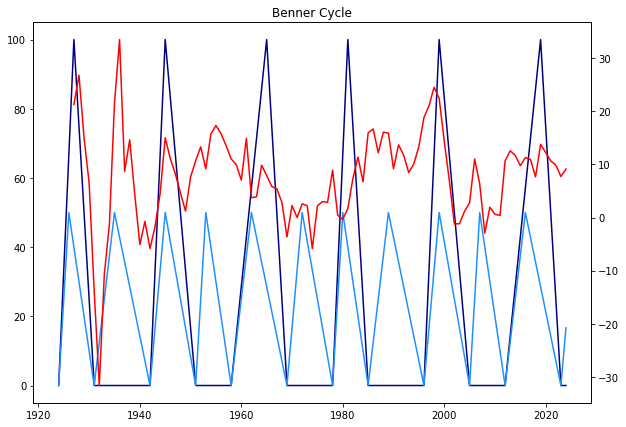

In [6]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax1.plot(data.year, data.major_value, color='navy')
ax1.plot(data.year, data.minor_value, color='dodgerblue')

ax2 = ax1.twinx()

ax2.plot(data.year, data.dj_smooth, color='red')

plt.title('Benner Cycle')
plt.show()

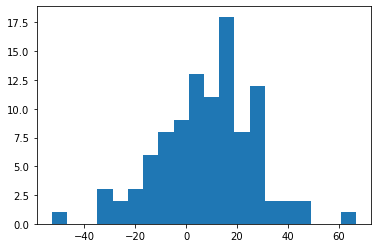

In [7]:
plt.hist(data.dj_return, bins=20)
plt.show()

In [8]:
mean_return = data.dj_return.mean()
sd_return = data.dj_return.std()

In [9]:
data[['minor_time', 'dj_return']].groupby(by='minor_time').mean()

,dj_return
minor_time,
favourable,12.995588
unfavourable,5.521493


In [10]:
favs = data[data.minor_time=='favourable'][['minor_time', 'dj_return']]
unfavs = data[data.minor_time=='unfavourable'][['minor_time', 'dj_return']]

In [11]:
def get_compound_rate(df):
    start_value = 1000
    end_value = start_value
    for _, row in df.iterrows():
        rate = row.dj_return/100
        end_value= end_value*(1+rate)
        
    compounded_rate = pow(end_value/start_value, 1/len(df))-1
    return compounded_rate

In [12]:
get_compound_rate(favs)

0.11946821124421647

In [13]:
get_compound_rate(unfavs)

0.03433677086153897

In [14]:
get_compound_rate(data)

0.062246389751115405

In [15]:
data.dj_return.mean()

8.037524752475248

In [16]:
data.dj_return.std()

19.027898749254504

In [17]:
data[['minor_time', 'dj_return']].groupby(by='minor_time').std()

,dj_return
minor_time,
favourable,15.87380
unfavourable,20.08727


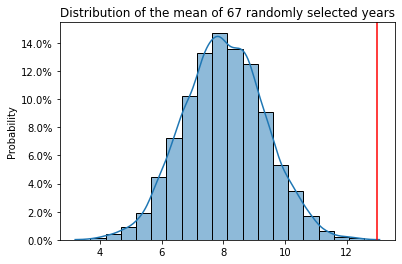

In [18]:
n = 67
avg_returns = []
for i in range(10000):
    df_sample = data.sample(n=n)
    avg_return = df_sample.dj_return.mean()
    avg_returns.append(avg_return)
    
ax = sns.histplot(avg_returns, kde=True, bins=20, stat='probability')
ax.axvline(13, color='r')
plt.title('Distribution of the mean of {} randomly selected years'.format(n))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

In [19]:
statistics.stdev(avg_returns)

1.3317200772145907

In [20]:
statistics.mean(avg_returns)

8.026951746268656

In [21]:
avg_stds = []
for i in range(10000):
    df_sample = data.sample(n=34)
    avg_std = df_sample.dj_return.std()
    avg_stds.append(avg_std)

(array([   5.,   18.,   41.,  109.,  237.,  443.,  659.,  858., 1026.,
        1150., 1263., 1175., 1001.,  779.,  564.,  360.,  188.,   87.,
          28.,    9.]),
 array([11.23158338, 11.97174085, 12.71189831, 13.45205578, 14.19221324,
        14.9323707 , 15.67252817, 16.41268563, 17.15284309, 17.89300056,
        18.63315802, 19.37331548, 20.11347295, 20.85363041, 21.59378787,
        22.33394534, 23.0741028 , 23.81426027, 24.55441773, 25.29457519,
        26.03473266]),
 <BarContainer object of 20 artists>)

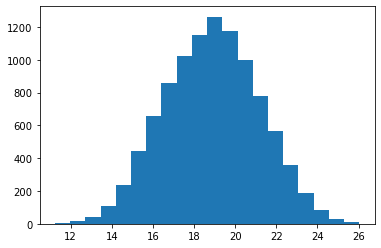

In [22]:
plt.hist(avg_stds, bins=20)

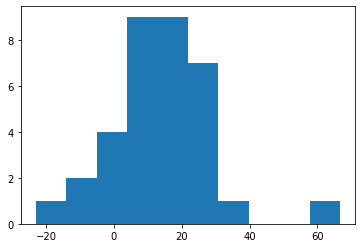

In [23]:
plt.hist(data[data.minor_time=='favourable'].dj_return, bins=10)
plt.show()

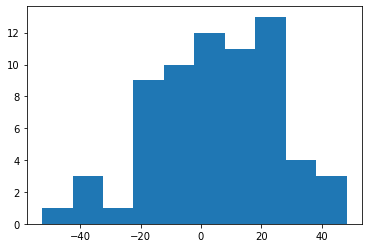

In [24]:
plt.hist(data[data.minor_time=='unfavourable'].dj_return, bins=10)
plt.show()

In [25]:
data[['minor_time', 'dj_return']].groupby(by='minor_time').count()

,dj_return
minor_time,
favourable,34
unfavourable,67


In [26]:
data[['year_type', 'dj_return']].groupby(by='year_type').count()

,dj_return
year_type,
favourable,52
unfavourable,49


In [27]:
data[['year_type_zero', 'dj_return']].groupby(by='year_type_zero').count()

,dj_return
year_type_zero,
favourable,70
unfavourable,31


In [28]:
data[['benner_classification', 'dj_return']].groupby(by='benner_classification').count()

,dj_return
benner_classification,
False,44
True,57


In [29]:
def confusion_matrix(actual, predicted):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                                display_labels = ['Favourable', 'Unfavourable'])

    cm_display.plot()
    plt.show()
    
def accuracy(actual, predicted):
    return metrics.accuracy_score(actual, predicted)

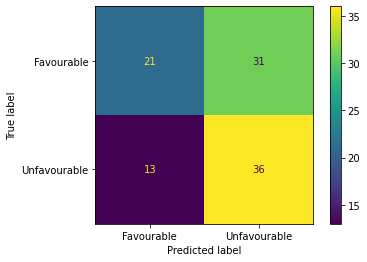

0.5643564356435643

In [30]:
confusion_matrix(data.year_type, data.minor_time)
accuracy(data.year_type, data.minor_time)

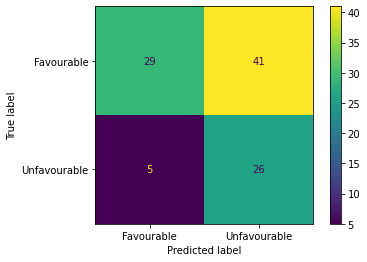

0.5445544554455446

In [31]:
confusion_matrix(data.year_type_zero, data.minor_time)
accuracy(data.year_type_zero, data.minor_time)

In [32]:
# years with returns over one standard deviation from mean
edge_data = data.loc[(data.dj_return>mean_return+sd_return)|(data.dj_return<mean_return-sd_return)]

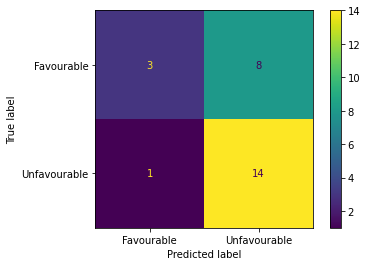

0.6538461538461539

In [33]:
confusion_matrix(edge_data.year_type_zero, edge_data.minor_time)
accuracy(edge_data.year_type_zero, edge_data.minor_time)

In [34]:
# compare a buy and hold strategy with a benner strategy

In [102]:
start_investment = 1000
hodl_strategy = [start_investment]
benner_strategy = [start_investment]
inverse_benner_strategy = [start_investment]

for _, row in data.iterrows():
    hodl_strategy.append(hodl_strategy[-1]*(1+row.dj_return/100))
    
    if row.minor_time == 'favourable':
        benner_strategy.append(benner_strategy[-1]*(1+row.dj_return/100))
        inverse_benner_strategy.append(inverse_benner_strategy[-1])

    else:
        benner_strategy.append(benner_strategy[-1])
        inverse_benner_strategy.append(inverse_benner_strategy[-1]*(1+row.dj_return/100))

In [105]:
benner_strategy[-1]

46387.40040749491

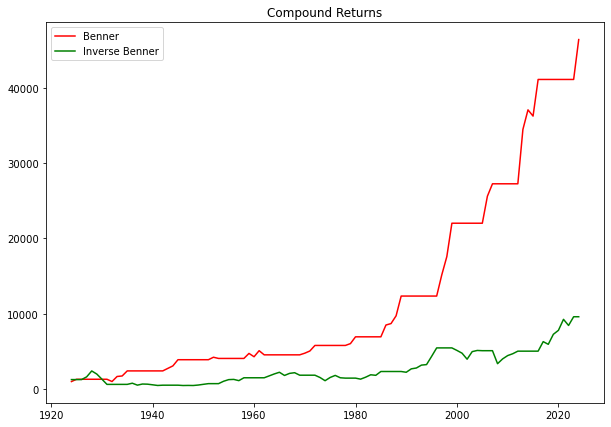

In [104]:
fig, ax = plt.subplots(figsize=(10,7))

#ax.plot(data.year, hodl_strategy[1:], color='navy', label='Hold Dow Jones')
ax.plot(data.year, benner_strategy[1:], color='red', label='Benner')
ax.plot(data.year, inverse_benner_strategy[1:], color='green', label='Inverse Benner')

plt.title('Compound Returns')
plt.legend()
plt.show()

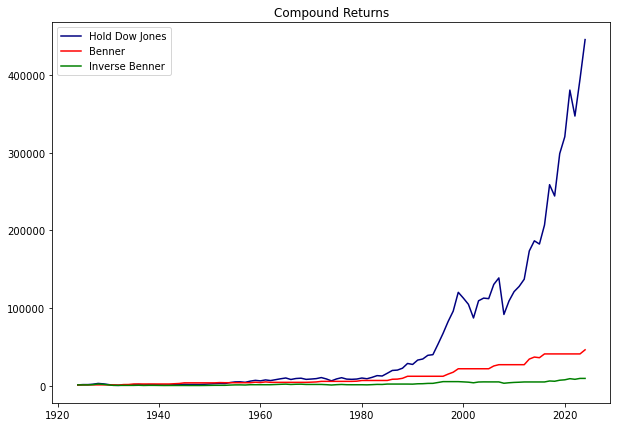

In [103]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(data.year, hodl_strategy[1:], color='navy', label='Hold Dow Jones')
ax.plot(data.year, benner_strategy[1:], color='red', label='Benner')
ax.plot(data.year, inverse_benner_strategy[1:], color='green', label='Inverse Benner')

plt.title('Compound Returns')
plt.legend()
plt.show()

In [106]:
hodl_strategy[-1]

445401.46051545

In [37]:
data.dj_return.mean()

8.037524752475248

In [38]:
data.dj_return.std()

19.027898749254504

In [39]:
sharpe = data.dj_return.mean() / data.dj_return.std()
sharpe

0.42240737447639354

In [40]:
benner_data = data[data.minor_time=='favourable'].copy()

In [41]:
benner_data.dj_return.mean()

12.995588235294116

In [42]:
benner_data.dj_return.std()

15.873799680925815

In [43]:
benner_sharpe = benner_data.dj_return.mean() / benner_data.dj_return.std()
benner_sharpe

0.8186816324077594

In [44]:
inverse_benner_data = data[data.minor_time=='unfavourable'].copy()

In [45]:
inverse_benner_data.dj_return.mean()

5.5214925373134305

In [46]:
inverse_benner_data.dj_return.std()

20.087270072130284

In [47]:
inverse_benner_sharpe = inverse_benner_data.dj_return.mean() / inverse_benner_data.dj_return.std()
inverse_benner_sharpe

0.2748752079046383

In [48]:
### look at returns by period rather than by year
num_periods = data.minor_period.unique()
for period in num_periods:
    df_period = data[data.minor_period==period]
    compounded_rate = get_compound_rate(df_period)
    period_length = len(df_period)
    data.loc[data['minor_period'] == period, ['period_compound_rate']] = compounded_rate
    data.loc[data['minor_period'] == period, ['period_length_years']] = period_length


In [49]:
period_data = pd.merge(
data[['minor_period', 'period_compound_rate', 'period_length_years']].groupby(by='minor_period', as_index=False).mean(),
data[['minor_time', 'minor_period']].drop_duplicates(),
    on='minor_period'
)

In [50]:
period_data['period_performance'] = ['favourable' if x > 0 else 'unfavourable' for x in period_data.period_compound_rate]

In [51]:
period_data

,minor_period,period_compound_rate,period_length_years,minor_time,period_performance
0,1,0.261600,1.0,unfavourable,favourable
1,2,0.142112,2.0,favourable,favourable
2,3,-0.131026,5.0,unfavourable,unfavourable
3,4,0.166250,4.0,favourable,favourable
4,5,-0.026514,7.0,unfavourable,unfavourable
5,6,0.173413,3.0,favourable,favourable
6,7,0.057143,6.0,unfavourable,favourable
7,8,0.021433,2.0,favourable,favourable
8,9,0.157492,5.0,unfavourable,favourable
9,10,0.028118,4.0,favourable,favourable


In [52]:
start_investment = 1000
hodl_strategy = [start_investment]
benner_strategy = [start_investment]
inverse_benner_strategy = [start_investment]

for _, row in period_data.iterrows():
    hodl_strategy.append(hodl_strategy[-1]*(1+row.period_compound_rate)**(row.period_length_years))
    
    if row.minor_time == 'favourable':
        benner_strategy.append(benner_strategy[-1]*(1+row.period_compound_rate)**(row.period_length_years))
        inverse_benner_strategy.append(inverse_benner_strategy[-1])

    else:
        benner_strategy.append(benner_strategy[-1])
        inverse_benner_strategy.append(inverse_benner_strategy[-1]*(1+row.period_compound_rate)**(row.period_length_years))

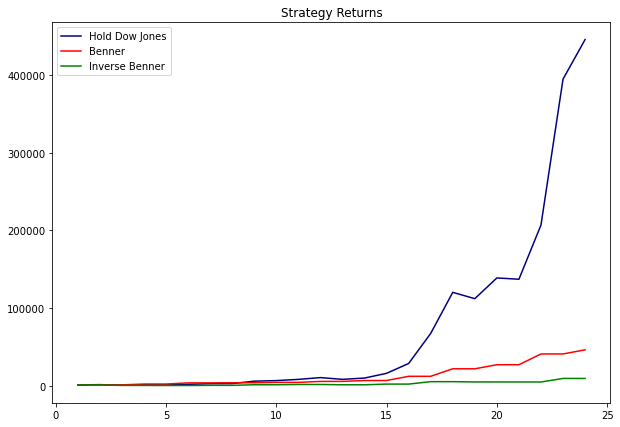

In [53]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(period_data.minor_period, hodl_strategy[1:], color='navy', label='Hold Dow Jones')
ax.plot(period_data.minor_period, benner_strategy[1:], color='red', label='Benner')
ax.plot(period_data.minor_period, inverse_benner_strategy[1:], color='green', label='Inverse Benner')

plt.title('Strategy Returns')
plt.legend()
plt.show()

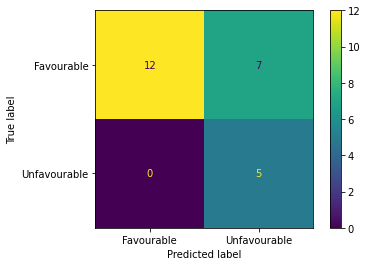

0.7083333333333334

In [54]:
confusion_matrix(period_data.period_performance, period_data.minor_time)
accuracy(period_data.period_performance, period_data.minor_time)

In [81]:
from scipy.stats import fisher_exact

In [100]:
table = [[29,5], [41,26]]
res = fisher_exact(table, alternative='two-sided')
res

(3.678048780487805, 0.013374843962396046)

In [92]:
from scipy.stats import hypergeom
table = np.array([[29,5], [41,26]])
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
hyper_dict = dict()
for x in np.arange(start, end+1):
    hyper = hypergeom.pmf(x, M, n, N)
    hyper_dict[x] = hyper

In [89]:
np.arange(start, end+1)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [93]:
hyper_dict

{3: 6.253071013346362e-23,
 4: 3.2469071236801026e-20,
 5: 6.428876104886598e-18,
 6: 6.732461920950678e-16,
 7: 4.3087756294084205e-14,
 8: 1.8323068364059237e-12,
 9: 5.46977522275252e-11,
 10: 1.1916296020996497e-09,
 11: 1.9499393488903497e-08,
 12: 2.450062681892758e-07,
 13: 2.404830755457828e-06,
 14: 1.8692093599240263e-05,
 15: 0.00011630636017305194,
 16: 0.0005843276268309576,
 17: 0.0023864136692423807,
 18: 0.007963550799953338,
 19: 0.02179498113671428,
 20: 0.049038707557607066,
 21: 0.09081242140297607,
 22: 0.1383911780710422,
 23: 0.17328982297591494,
 24: 0.17775960015584735,
 25: 0.1486716655848922,
 26: 0.1006890042840817,
 27: 0.05469526158641518,
 28: 0.023518962482158633,
 29: 0.007860448999342079,
 30: 0.0019893728948952205,
 31: 0.0003667046810866779,
 32: 4.623324104217811e-05,
 33: 3.5492185042480032e-06,
 34: 1.2459305944703631e-07}

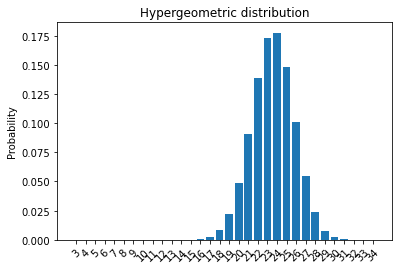

In [99]:
plt.bar(range(len(hyper_dict)), list(hyper_dict.values()), align='center')
plt.xticks(range(len(hyper_dict)), list(hyper_dict.keys()), rotation=45)
plt.title('Hypergeometric distribution')
plt.ylabel('Probability')
plt.show()